<a href="https://colab.research.google.com/github/srinilsukumar/Data-analysis-ML-Projects/blob/main/Deeplearning_keras_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [144]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Load MNIST dataset from keras.datasets

In [145]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [146]:
len(X_train)

60000

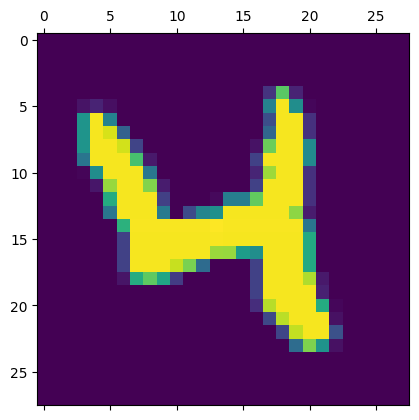

In [147]:
%matplotlib inline
plt.matshow(X_train[20])

In [148]:
X_train.shape

(60000, 28, 28)

## Reshape input data into 1-D array

In [149]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

## Feature Scaling

In [150]:
""" from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train_flattened)
scaler.fit(X_test_flattened) """

' from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nscaler.fit_transform(X_train_flattened)\nscaler.fit(X_test_flattened) '

In [151]:
X_train_flattened=X_train_flattened/255
X_test_flattened=X_test_flattened/255

In [152]:
X_train_flattened.shape

(60000, 784)

## Neural network without Hidden layer

In [153]:
model=keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8137 - loss: 0.7166
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9149 - loss: 0.3103
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9224 - loss: 0.2790
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9253 - loss: 0.2665
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9251 - loss: 0.2671


## Evaluating model performance

In [154]:
model.evaluate(X_train_flattened,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9289 - loss: 0.2573


[0.25933516025543213, 0.9283166527748108]

In [155]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9129 - loss: 0.3072


[0.2706548869609833, 0.9251000285148621]

In [156]:
y_pred=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [157]:
y_predicted_labels=np.array([np.argmax(i) for i in y_pred])
print(y_predicted_labels[100:120])
print(y_test[100:120])

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]
[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]


In [158]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    9,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    9,  930,   12,    6,    4,   13,    8,   41,    4],
       [   3,    0,   26,  898,    0,   39,    2,   11,   25,    6],
       [   1,    1,    7,    1,  913,    0,   16,    4,   11,   28],
       [  10,    3,    2,   24,    7,  783,   22,    4,   31,    6],
       [   7,    3,    7,    1,    7,    7,  923,    2,    1,    0],
       [   1,    7,   27,    5,    7,    1,    0,  940,    5,   35],
       [   5,    7,    6,   15,    8,   23,   11,    6,  887,    6],
       [  10,    7,    1,   10,   30,    8,    0,   21,   12,  910]],
      dtype=int32)>

<Axes: >

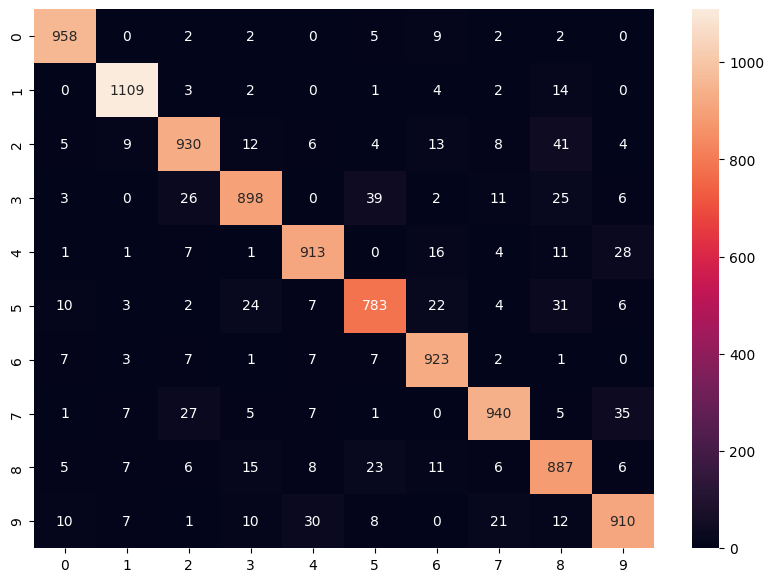

In [163]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')

## Neural network with Hidden layers

In [ ]:
model=keras.sequential([keras.layers.Dense])